In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test
sets.

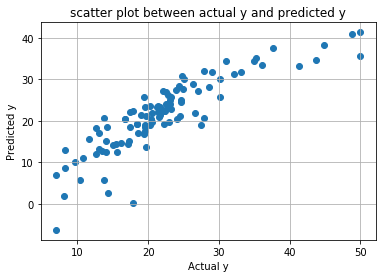

Mean Squared Error : 20.869292183770682
Mean Absolute Error : 3.21327049584237


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

plt.scatter(Y_test,lin_model.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lin_model.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lin_model.predict(X_test)))

### Model evaluation
We will evaluate our model using RMSE and R2-score

In [5]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303193
R2 score is 0.7334492147453092


In [6]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


In [7]:
def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()

In [8]:
def CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]-1))
        b_temp=0
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur=w_old-learning_rate*w_temp
        b_cur=b_old-learning_rate*b_temp
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur

In [9]:
# Funtion to get optimal learning rate on the implemented SGD Classifier
from math import log
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)
x1_train = normalizer.transform(x1_train)
x1_cv=normalizer.transform(x1_cv)
x1_train_=np.array(x1_train)
x1_train_data=pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_
x1_cv_data=pd.DataFrame(x1_cv)
x1_cv_data['price']=y1_cv_
y1_train_=np.array(y1_train_)
y1_cv_=np.array(y1_cv_)
#print(y1_cv_.shape)

def tuneParams_learning_rate():
    train_error=[]
    cv_error=[]
    r=[0.00001,0.0001,0.001,0.01,0.1,1,2,5,10]
    for itr in r:
        w,b=CustomGradientDescentRegressor(x1_train_data,learning_rate=itr,n_itr=1000)
        # print(w.shape,b.shape,x1_train_.shape)
        y1_pred_train=predict(x1_train_,w,b)
        train_error.append(mean_squared_error(y1_train_,y1_pred_train))
        w,b=CustomGradientDescentRegressor(x1_cv_data,learning_rate=itr,n_itr=1000)
        y1_pred_cv=predict(x1_cv,w,b)
        cv_error.append(mean_squared_error(y1_cv_,y1_pred_cv))
    return train_error,cv_error

In [10]:
train_error,cv_error=tuneParams_learning_rate()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# plotting obtained values
import math
r=[0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error,label='train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')

In [ ]:
# running implemented SGD Classifier with obtained optimal learning rate

# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

train_data=pd.DataFrame(X_train)
train_data['price']=Y_train
train_data.head(3)

w,b=CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000)
y_pred=predict(X_test,w,b)
plot_(Y_test,y_pred)

# Errors in implemeted model
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))

### Comparing Models

In [ ]:
from prettytable import PrettyTable
# MSE = mean squared error
# MAE =mean absolute error

# SkLearn SGD classifier predicted weight matrix
sklearn_w=lin_model.coef_
sklearn_w

# weight vector obtained from impemented SGD Classifier
custom_w=w
custom_w

x=PrettyTable()
x.field_names=['Model','Weight Vector','MSE','MAE']
x.add_row(['sklearn',sklearn_w,mean_squared_error(Y_test, lin_model.predict(X_test)),mean_absolute_error(Y_test, lin_model.predict(X_test))])
x.add_row(['custom',custom_w,mean_squared_error(Y_test,y_pred),(mean_absolute_error(Y_test,y_pred))])
print(x)

In [ ]:
sklearn_pred=lin_model.predict(X_test)
implemented_pred=y_pred
x=PrettyTable()
x.field_names=['SKLearn Linear predicted value','Implemented SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr],implemented_pred[itr]])
print(x)